In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
df=pd.read_csv("C:\\Users\\Nasir\\Desktop\\Temp\\Data Analysis Projects\\Project 4\\movies.csv")

In [2]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [3]:
#Let's see if there is any missing value

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} -{}%'.format(col,pct_missing))

name -0.0%
rating -0.010041731872717789%
genre -0.0%
year -0.0%
released -0.0002608242044861763%
score -0.0003912363067292645%
votes -0.0003912363067292645%
director -0.0%
writer -0.0003912363067292645%
star -0.00013041210224308815%
country -0.0003912363067292645%
budget -0.2831246739697444%
gross -0.02464788732394366%
company -0.002217005738132499%
runtime -0.0005216484089723526%


In [4]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
# Handling Non_Finite values in columns

df['budget'] = df['budget'].fillna(pd.NA)
df['gross'] = df['gross'].fillna(pd.NA)

# Changing data type of columns
df['budget'] = df['budget'].astype('Int64')
df['gross'] = df['gross'].astype('Int64')

In [6]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        Int64
gross         Int64
company      object
runtime     float64
dtype: object

In [7]:
# Extracting only Year form released column

df['Released_Year']=df['released'].astype(str).str.split(',',expand=True) [1].str[:5]


In [8]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released_Year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,<NA>,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,<NA>,<NA>,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,<NA>,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,<NA>,NaN,120.0,2020


In [9]:
# Drop any duplicate values

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

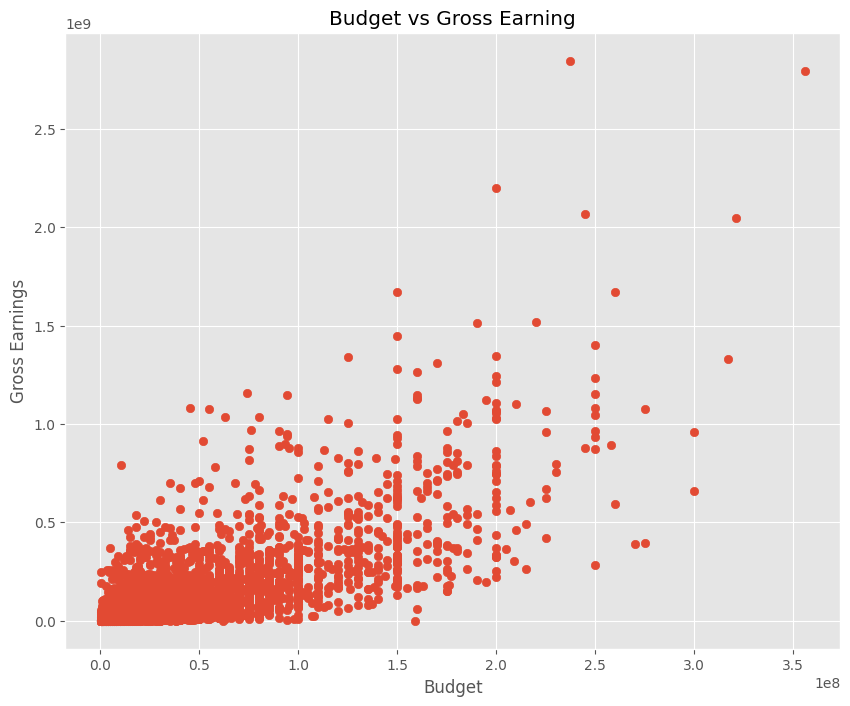

In [12]:
# Scatter plot with budget vs gross

plt.scatter(x= df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()


<Axes: xlabel='budget', ylabel='gross'>

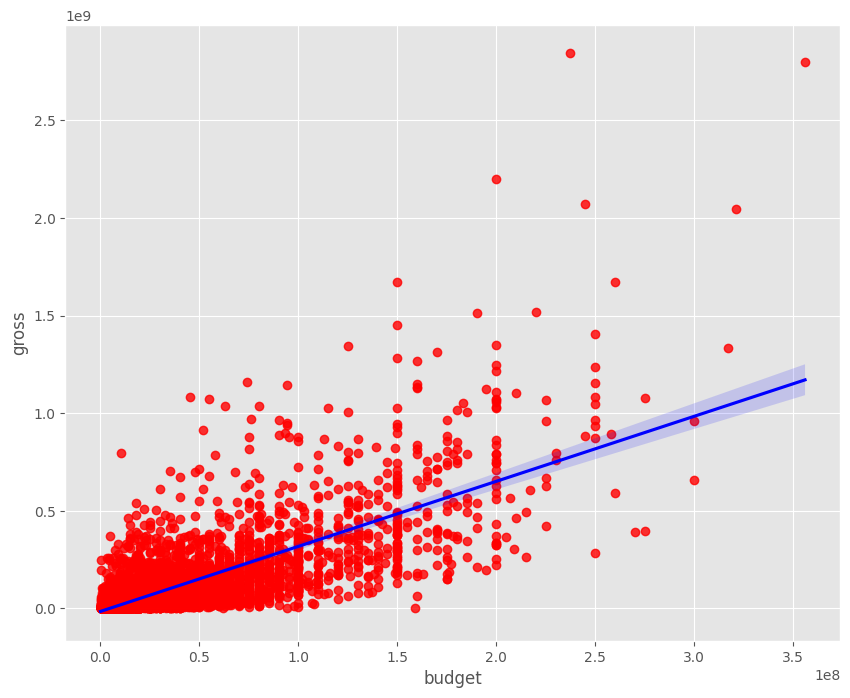

In [13]:

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [14]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [15]:
#Looking at Correlation

df[['year','score','votes','budget','gross','runtime']].corr(method='pearson') #pearson,kendall,spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


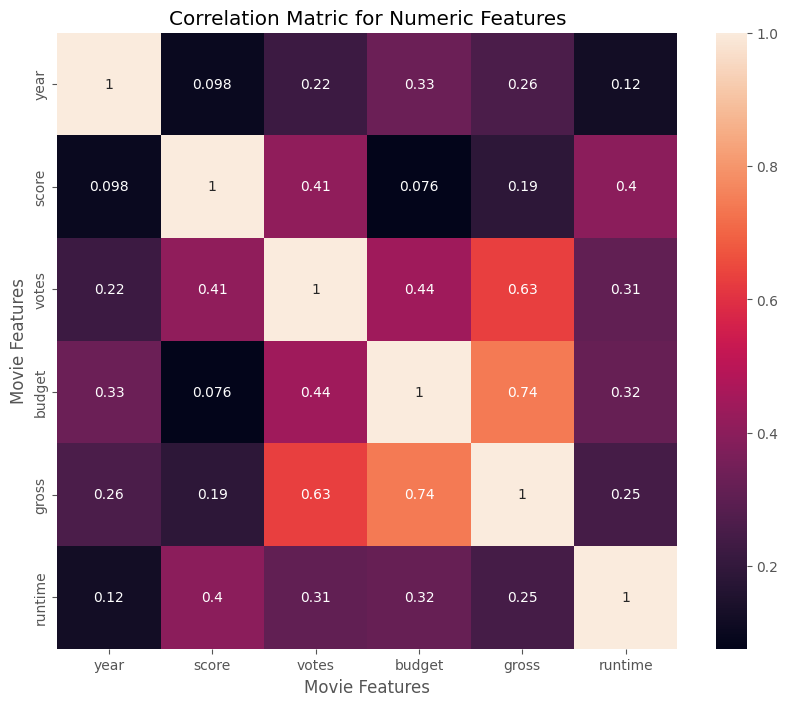

In [16]:
correlation_matrix=df[['year','score','votes','budget','gross','runtime']].corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()


In [17]:
# Changing String data type into numeric format 

df_numerized=df
for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col]= df_numerized[col].astype('category')
        df_numerized[col]=df_numerized[col].cat.codes
df_numerized
    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0


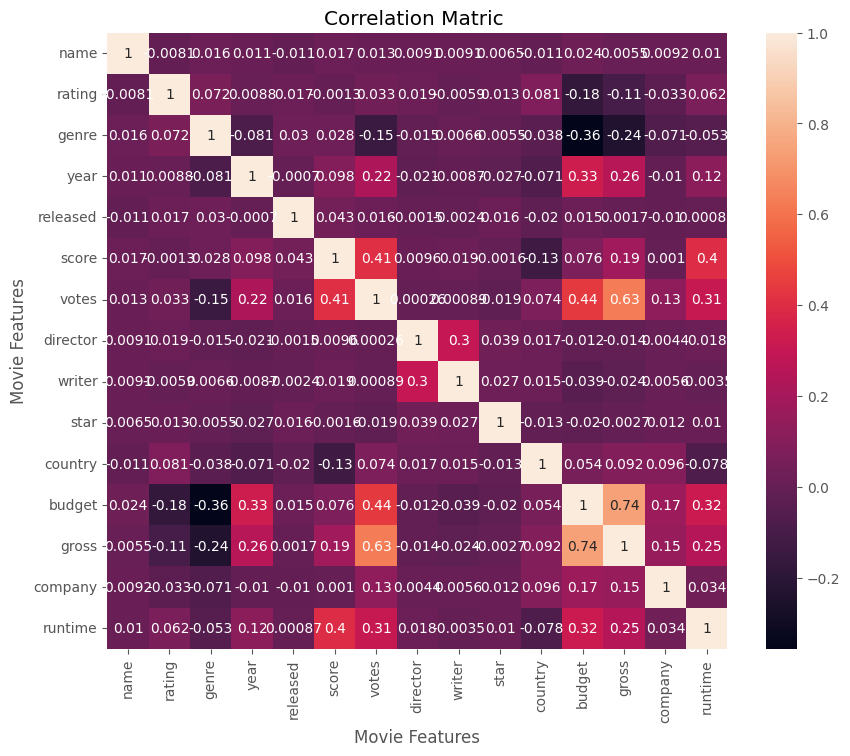

In [18]:
correlation_matrix=df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matric ')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [19]:
pd.set_option('display.max_rows',None)

In [20]:
correlation_mat=df_numerized.corr()
correlation_pair= correlation_mat.unstack()
correlation_pair

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.023970
          gross       0.005533
          company     0.009211
          runtime     0.010392
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.176002
          gross      -0.107339
          company    -0.032943
          runtime     0.062145
genre     name        0.016355
          rating      0.072423
        

In [21]:
sorted_pairs=correlation_pair.sort_values()
sorted_pairs


budget    genre      -0.356564
genre     budget     -0.356564
          gross      -0.235650
gross     genre      -0.235650
rating    budget     -0.176002
budget    rating     -0.176002
genre     votes      -0.145307
votes     genre      -0.145307
score     country    -0.133348
country   score      -0.133348
gross     rating     -0.107339
rating    gross      -0.107339
year      genre      -0.081261
genre     year       -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
company   genre      -0.071067
genre     company    -0.071067
year      country    -0.070938
country   year       -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
writer    budget     -0.039451
budget    writer     -0.039451
genre     country    -0.037615
country   genre      -0.037615
company   rating     -0.032943
rating    company    -0.032943
star      year       -0.027242
year      star       -0.027242
writer    gross      -0.023519
gross     writer     -0.023519
year    

In [22]:
high_correlation = sorted_pairs[(sorted_pairs)>.5]
high_correlation

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Votes and Budget have High Correlation to Gross Earnings
#Company has low correlation